# Machine Learning Part 1: 
This week's material provides a brief introduction into three machine learning algorithms. This work assumes that 
the reader is familiar with concepts in statistical theory and Scikit Learn.
<br>- Step 0) Load Libraries
<br>- Step 1) Relevant Functions
<br>- Step 2) Load Data
<br>- Step 3) Curate Data
<br>- Step 4) Split Data into Training and Test data frames
<br>- Step 5) Implement SVM and view metrics
    <br> - Step 5a) Visualize SVM Curating
    <br> - Step 5b) Visualize SVM Scaled
    <br> - Step 5c) Visualize SVM Normalized
<br>- Step 6) Implement CART and view metrics
<br>- Step 7) Implement Random Forests and view metrics

In [1]:
##-------------------------------------
## Step 0) Load Libraries
##-------------------------------------
##------------------------------------------------
## ~~ Manipulation
## Array Manipulation
import numpy as np                       
## Data Frame Manipulation
import pandas as pd 
## Preprocessing Data
from sklearn import preprocessing
##------------------------------------------------
##------------------------------------------------
## ~~ Machine Learning
## SVM
from sklearn.svm import SVC 
## CART
from sklearn import tree
## MLP
from sklearn.neural_network import MLPClassifier
## Random Forest
from sklearn.ensemble import RandomForestClassifier
##------------------------------------------------
##------------------------------------------------
## ~~ Validation & Metrics
## To Split into test and train
from sklearn.model_selection import train_test_split 
## Use Confusion Matrix
from sklearn.metrics import confusion_matrix 
##------------------------------------------------
##------------------------------------------------
## ~~ Visualization & Misc
## Visualize Tree
import graphviz 
## Save Image
import matplotlib.pyplot as plt
## Change Directory in Python
import os  
%matplotlib inline
##------------------------------------------------


In [2]:
##-------------------------------------
## Step 1)  Relevant Functions
##-------------------------------------
## Function to evaluate predictions
def imp_metrics(TP,TN,FP,FN):
    """
   Function Name: imp_metrics
   Input: TP,FN,TP,FP
   Output: Accuracy, Recal, Precision, F1
   Purpose: Find metrics to understand recovery of SVM
    
    """
    ## Calculate Accuracy
    accuracy = (TP + TN) / (TP + TN + FN + FP)
    
    ## Calculate Recall
    if(TP != 0 and FN != 0):
        recall = TP/(TP+FN)
    else:
        recall = np.nan

    ## Calculate Precision
    if(TP != 0 and FP != 0):
        precision = TP/(TP+FP)
    else:
        precision =np.nan

    ## Calculate F1
    if(precision == np.nan and recall == np.nan):
        F1 = np.nan
    else:
        F1 = 2*((precision*recall)/(precision+recall))
        
    ## Concatenate    
    metrics = np.array([accuracy,recall,precision,F1])
    return(metrics.round(2))



## Format Metrics
def provide_results(cf_matrix,algo):
    """
    Function Name: provide_results
    Input: confusion matrix & type of algoritm
    Output: Accuracy, Recall, precision, and F1 for algoritm
    Purpose: Uses confusion matrix to find 4 important metrics
    """
    ## Find True Positive & Negative and False Positive & Negative
    TP = cf_matrix[0,0]
    TN = cf_matrix[1,1]
    FP = cf_matrix[0,1]
    FN = cf_matrix[1,0] 
    ## Calculate Accuracy, Recal, Precision, F1
    metrics = imp_metrics(TP,TN,FP,FN)
    print('\n',
          algo + ' Accuracy : ',  metrics[0],'\n',
          algo + ' Recall: ',     metrics[1],'\n',
          algo + ' Precision: ',  metrics[2],'\n',
          algo + ' F1: ',         metrics[3])
    
def split_into_groups(x,type_split):
    """
    Function Name: split_into_groups
    Input: series or list, split by median or percentile
    Output: series split into groups
    Purpose: Split cut data based on splits
    """
    if(type_split == 'median'): ## Based on Median
        median_value = np.median(x)
        new_x = np.where(x > median_value , 1, 0) 
    elif(type_split == 'percentile'):  ## Based on percentile
        percents = np.percentile(x,[25,75])
        new_x = np.where(x < percents[0] , 1,
                         np.where((x > percents[0]) &
                         (x < percents[1]),2,3))
    return(new_x)
        

In [3]:
##-------------------------------------
## Step 2) Load Data
##-------------------------------------
default_path = 'C:/Users/james/OneDrive/Documents/Important_Files/Favorite_5_ML algorithms'
os.chdir(default_path)
king = pd.read_csv('king.csv', index_col='id')

In [4]:
##-------------------------------------
## Step 3) Curate Data
##-------------------------------------
## 1) Make Yes/No features into 1/0 features
king['low'] = king['low'].map(dict(Yes=1, No=0))
king['firstep'] = king['firstep'].map(dict(Yes=1, No=0))
king['smoker'] = king['smoker'].map(dict(Y=1, N=0))
king['drinker'] = king['drinker'].map(dict(Y=1, N=0))

## 2) Make Gender into 1:Female and 0:Male
king['gender'] = king['gender'].map(dict(F=1, M=0))

## 3) Make Race into dummy variables and drop race feature
race_variables = pd.get_dummies(king['race'])
king = pd.concat([king,race_variables],axis = 1)
king = king.drop(columns=['race'])

## 4) Make Educational Level into dummy 
##    variables as well and drop educlv
educlv_variables = pd.get_dummies(king['educlv'])
king = pd.concat([king,educlv_variables],axis = 1)
king = king.drop(columns=['educlv'])

## 5) Make birth weight into a three levels variable 
##    based on percentiles and drop bwt
king['bwt_class'] = split_into_groups(king['bwt'],'median')
king = king.drop(columns=['bwt','low'])


In [5]:
##-------------------------------------
## Step 4) Split Data into Training and 
## Test data frames
##-------------------------------------
## Split DF into Features and Labels
response_variable = 'bwt_class'
y = king[response_variable]
X = king.drop(columns=[response_variable])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=44, 
                                                    test_size = 0.26)

In [6]:
##-------------------------------------
## Step 5) Implement SVM and view metrics
##-------------------------------------

## SVM specifications
kernel_type = 'linear'
penalty = 1
clf_svm = SVC(C = penalty, kernel = kernel_type)
## Run SVM algorithm
clf_svm =  clf_svm.fit(X_train, y_train)
## Predict y_est_svm
y_est_svm = clf_svm.predict(X_test) 
## Determine Confusion matrix
cf_matrix_svm = confusion_matrix(y_est_svm,y_test)
## Display Metrics
provide_results(cf_matrix_svm,'SVM')


 SVM Accuracy :  0.71 
 SVM Recall:  0.62 
 SVM Precision:  0.76 
 SVM F1:  0.68


Needed to reduce Dimension to better visualize separating hyperplanes in data
Needed to scale/standardize to better understand separating hyperplanes with relation to the features

In [7]:
##-------------------------------------
## Step 5a) Visualize SVM Curating
##-------------------------------------
## Limit the number of Feature to better
## understand visualizing SVM, 
## Choose wpre & gest because the perform in CART

## Normalized Method 1
## Train
X_train_reduced = X_train[['wpre','gest']].astype('float')
x_train = X_train_reduced.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train_reduced_scaled = min_max_scaler.fit_transform(x_train)
X_train_reduced_scaled = pd.DataFrame(X_train_reduced_scaled)
X_train_reduced_scaled.columns = ['wpre_scaled','gest_scaled']

## Test
X_test_reduced = X_test[['wpre','gest']].astype('float')
x_test = X_test_reduced.values #returns a numpy array
X_test_reduced_scaled = min_max_scaler.fit_transform(x_test)
X_test_reduced_scaled = pd.DataFrame(X_test_reduced_scaled)
X_test_reduced_scaled.columns = ['wpre_scaled','gest_scaled']

## Normalized Method 2
## Train
mean_col_train = X_train_reduced.mean()
std_col_train = X_train_reduced.std()
X_train_reduced_normalized = (X_train_reduced-mean_col_train)/std_col_train
X_train_reduced_normalized.columns = ['wpre_normalized','gest_normalized'] 

## Test
mean_col_test = X_test_reduced.mean()
std_col_test = X_test_reduced.std()
X_test_reduced_normalized = (X_test_reduced-mean_col_test)/std_col_test
X_test_reduced_normalized.columns = ['wpre_normalized','gest_normalized'] 


 SVM Scaled Accuracy :  0.66 
 SVM Scaled Recall:  0.64 
 SVM Scaled Precision:  0.68 
 SVM Scaled F1:  0.66


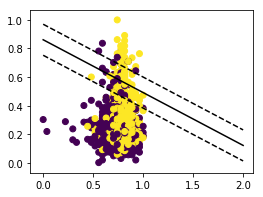

In [13]:
##-------------------------------------
## Step 5b) Visualize SVM Scaled
##-------------------------------------
## Run SVM algorithm
clf_svm =  clf_svm.fit(X_train_reduced_scaled, y_train)
## Predict y_est_svm
y_est_svm = clf_svm.predict(X_test_reduced_scaled) 
## Determine Confusion matrix
cf_matrix_svm = confusion_matrix(y_est_svm,y_test)
## Display Metrics
provide_results(cf_matrix_svm,'SVM Scaled')

# Get the separating hyperplane
w = clf_svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 2)
yy = a * xx - (clf_svm.intercept_[0]) / w[1]

## Create Margins to find parallel Hyperplanes
margin = 1 / np.sqrt(np.sum(clf_svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
_ = plt.figure(1, figsize=(4, 3))
_ = plt.clf()
_ = plt.plot(xx, yy, 'k-')
_ = plt.plot(xx, yy_down, 'k--')
_ = plt.plot(xx, yy_up, 'k--')


_ = plt.scatter(X_train_reduced_scaled['gest_scaled'],
                X_train_reduced_scaled['wpre_scaled'], c=y_train)


In [ ]:
##-------------------------------------
## Step 5c) Visualize SVM Normalized
##-------------------------------------
## Run SVM algorithm
clf_svm =  clf_svm.fit(X_train_reduced_normalized, y_train)
## Predict y_est_svm
y_est_svm = clf_svm.predict(X_test_reduced_normalized) 
## Determine Confusion matrix
cf_matrix_svm = confusion_matrix(y_est_svm,y_test)
## Display Metrics
provide_results(cf_matrix_svm,'SVM Normalized')

# Get the separating hyperplane
w = clf_svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-8, 3)
yy = a * xx - (clf_svm.intercept_[0]) / w[1]

## Create Margins to find parallel Hyperplanes
margin = 1 / np.sqrt(np.sum(clf_svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
_ = plt.figure(fignum, figsize=(4, 3))
_ = plt.clf()
_ = plt.plot(xx, yy, 'k-')
_ = plt.plot(xx, yy_down, 'k--')
_ = plt.plot(xx, yy_up, 'k--')


_ = plt.scatter(X_train_reduced_normalized['gest_normalized'],
                X_train_reduced_normalized['wpre_normalized'], c=y_train)


In [9]:
##-------------------------------------
## Step 6) Implement CART and view metrics
##-------------------------------------
## CART specifications
clf = tree.DecisionTreeClassifier(max_depth=2)
## Run CART algorithm
clf_cart = clf.fit(X_train, y_train) 
## Predict y_est_cart
y_est_cart = clf_cart.predict(X_test)
## Determine Confusion matrix
cf_matrix_cart = confusion_matrix(y_est_cart,y_test)
## Display Metrics
provide_results(cf_matrix_cart,'CART')




 CART Accuracy :  0.66 
 CART Recall:  0.44 
 CART Precision:  0.81 
 CART F1:  0.57


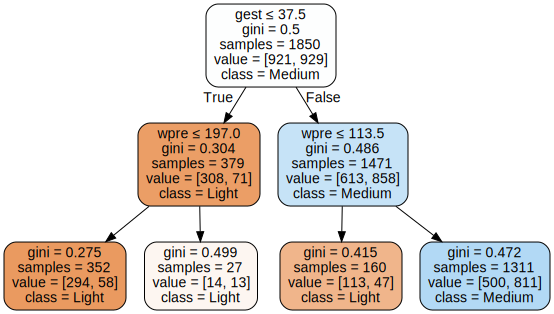

In [10]:
##-------------------------------------
## Step 8) Visualize CART
##-------------------------------------
dot_data = tree.export_graphviz(clf_cart, out_file=None, 
                          feature_names=X_train.columns,  
                          class_names=['Light','Medium','Heavy'],  
                          filled=True, rounded=True,  
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('tree_length2')
graph

In [12]:
##-------------------------------------
## Step 9) Implement Random Forests and view metrics
##-------------------------------------

## SVM specifications
depth_max = 4
min_num_samples_split = 20
clf_rf = RandomForestClassifier(max_depth=depth_max,
                                    min_samples_split=min_num_samples_split,
                                    random_state=0)

## Run Random Forest algorithm
clf_rf =  clf_svm.fit(X_train, y_train)
## Predict y_est_rf
y_est_rf = clf_svm.predict(X_test) 
## Determine Confusion matrix
cf_matrix_rf = confusion_matrix(y_est_rf,y_test)
## Display Metrics
provide_results(cf_matrix_rf,'RF')


 RF Accuracy :  0.71 
 RF Recall:  0.62 
 RF Precision:  0.76 
 RF F1:  0.68


## Ploting SVM
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
## Data
http://courses.washington.edu/b517/Datasets/datasets.html

## Make better choices with Decision Trees
http://scikit-learn.org/stable/modules/tree.html#classification-criteria

## Data Reduction
http://scikit-learn.org/stable/modules/decomposition.html#ica

## View Decision Trees better
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py

## View Random Forest Plots
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html